<h2 style='color:blue' align="center">KNN (K Nearest Neighbors) Classification: Machine Tutorial Using Python Sklearn</h2>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

[![iris-petal-sepal.png](https://i.postimg.cc/5ts6F3BK/iris-petal-sepal.png)](https://postimg.cc/Z9yTG6D6)

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [8]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

**Train test split**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
len(X_train)

120

In [18]:
len(X_test)

30

**Create KNN (K Neighrest Neighbour Classifier)**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [21]:
knn.score(X_test, y_test)

0.9666666666666667

In [22]:
knn.predict([[4.8,3.0,1.5,0.3]])

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

**Plot Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(58.222222222222214, 0.5, 'Truth')

**Print classification report for precesion, recall and f1-score for each classes**

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Bulding KNN from Scrath

Accuracy (k=5): 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.64      0.54      0.58        13
   virginica       0.60      0.69      0.64        13

    accuracy                           0.78        45
   macro avg       0.75      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



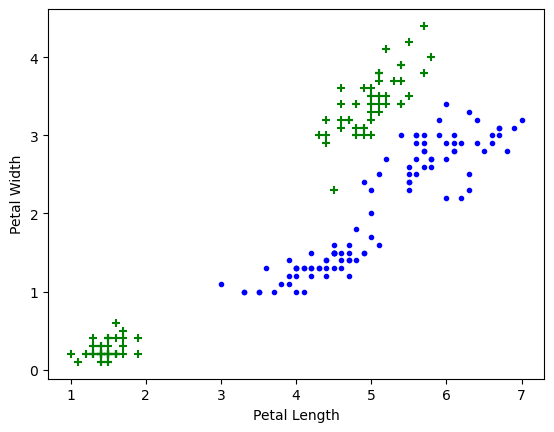

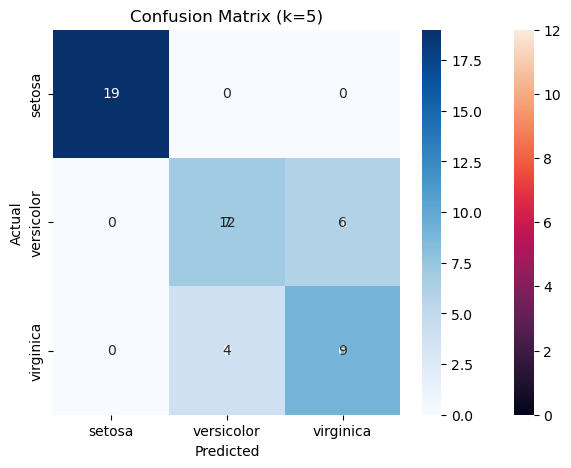

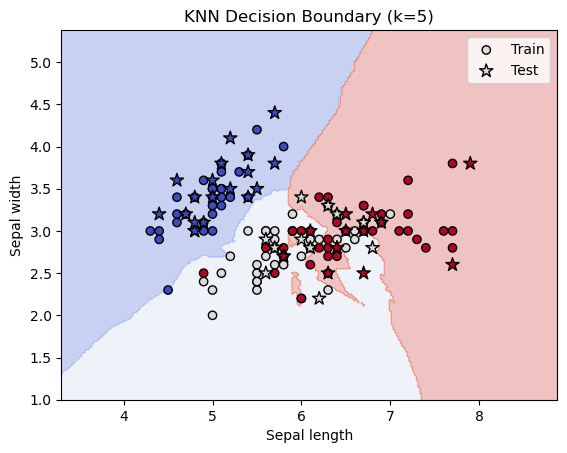

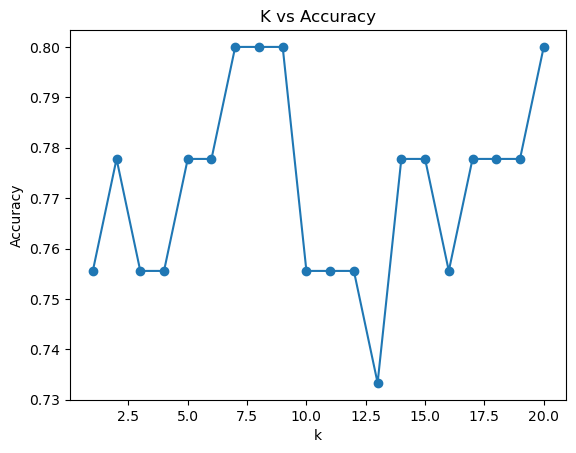

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# -------------------------
# Step 1: Load Dataset
# -------------------------
iris = load_iris()
X = iris.data[:, :2]   # take first 2 features (for visualization: Sepal Length & Sepal Width)
y = iris.target
target_names = iris.target_names

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------
# Step 2: User-defined KNN
# -------------------------
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        # compute distances to all training points
        distances = [euclidean_distance(test_point, x) for x in X_train]

        # get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # get labels of nearest neighbors
        k_labels = [y_train[i] for i in k_indices]

        # majority vote
        label = max(set(k_labels), key=k_labels.count)
        predictions.append(label)
    return np.array(predictions)

# -------------------------
# Step 3: Train & Predict
# -------------------------
k = 5
y_pred = knn_predict(X_train, y_train, X_test, k=k)

# -------------------------
# Step 4: Evaluation
# -------------------------
print(f"Accuracy (k={k}):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (k={k})")
plt.show()

# -------------------------
# Step 5: Decision Boundary
# -------------------------
h = 0.02  # step size in mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for mesh points
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_predict(X_train, y_train, mesh_points, k=k)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, marker="o", label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm, marker="*", s=100, label="Test")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title(f"KNN Decision Boundary (k={k})")
plt.legend()
plt.show()

# -------------------------
# Step 6: Accuracy vs k curve
# -------------------------
k_values = range(1, 21)
acc_scores = []
for k in k_values:
    y_pred_k = knn_predict(X_train, y_train, X_test, k=k)
    acc_scores.append(accuracy_score(y_test, y_pred_k))

plt.plot(k_values, acc_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()


From sklearn.datasets load digits dataset and do following

Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
Plot confusion matrix
Plot classification report

Dataset shape: (1797, 64)
Number of classes: 10
Best K found: 1
Best Cross-Validation Accuracy: 97.56%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.97      0.97      0.97        35
           3       0.97      1.00      0.99        37
           4       0.97      0.94      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       0.94      0.89      0.91        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



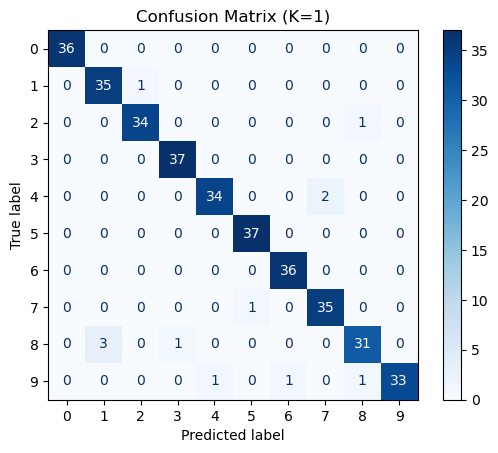

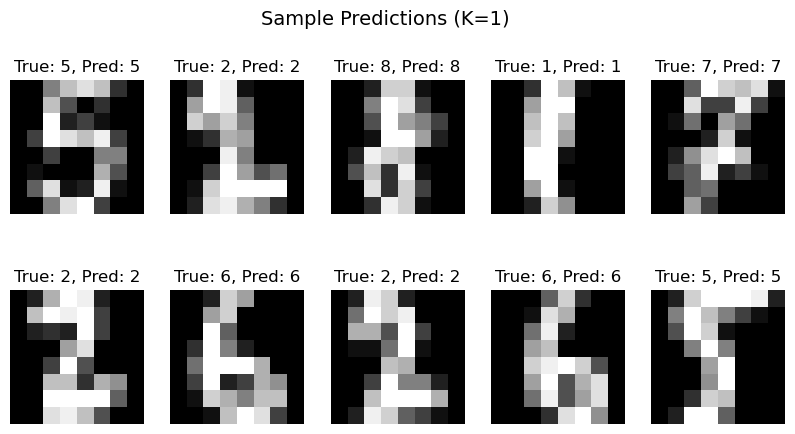

In [31]:


# 1️⃣ Import required libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 2️⃣ Load the Digits dataset
# ------------------------------------------------------------
digits = load_digits()
X, y = digits.data, digits.target

print("Dataset shape:", X.shape)
print("Number of classes:", len(set(y)))

# ------------------------------------------------------------
# 3️⃣ Split into Train and Test sets
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------------------------
# 4️⃣ Feature Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 5️⃣ Find the best value of K using GridSearchCV
# ------------------------------------------------------------
param_grid = {'n_neighbors': list(range(1, 21))}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

best_k = grid.best_params_['n_neighbors']
best_score = grid.best_score_

print(f"Best K found: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_score*100:.2f}%")

# ------------------------------------------------------------
# 6️⃣ Train final model using the best K
# ------------------------------------------------------------
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# ------------------------------------------------------------
# 7️⃣ Make Predictions
# ------------------------------------------------------------
y_pred = best_knn.predict(X_test_scaled)

# ------------------------------------------------------------
# 8️⃣ Evaluate Model Performance
# ------------------------------------------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------------------------------------------------
# 9️⃣ Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

# ------------------------------------------------------------
# 🔟 Visualize a few predictions
# ------------------------------------------------------------
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle(f'Sample Predictions (K={best_k})', fontsize=14)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()
